In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%config Completer.use_jedi = False  # 자동완성 속도 증가

In [2]:
import numpy as np
import tensorflow as tf
tf.compat.v1.enable_eager_execution()
from tensorflow import keras

In [3]:
# 로이더 데이터셋 로드
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [4]:
# 데이터셋을 텍스트로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [5]:
# 멀티 핫 인코딩
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        for j in sequences:
            results[i, j] = 1.
    return results

In [6]:
# 데이터 인코딩
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 레이블 인코딩
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [8]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [9]:
# 레이블 인코딩 with keras
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

Using TensorFlow backend.


In [10]:
# 모델 정의
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [11]:
# 모델 컴파일
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# 검증 세트 준비
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
# 모델 훈련
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 22ms/step - loss: 2.6767 - accuracy: 0.5457 - val_loss: 1.7741 - val_accuracy: 0.6490
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.4260 - accuracy: 0.7072 - val_loss: 1.2942 - val_accuracy: 0.7230
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0328 - accuracy: 0.7806 - val_loss: 1.1101 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8044 - accuracy: 0.8286 - val_loss: 1.0152 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6355 - accuracy: 0.8678 - val_loss: 0.9995 - val_accuracy: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5054 - accuracy: 0.8986 - val_loss: 0.9266 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4131 - accuracy: 0.9153 - val_loss: 0.8996 - val_accuracy: 0.8150
Epoch 8/20
16

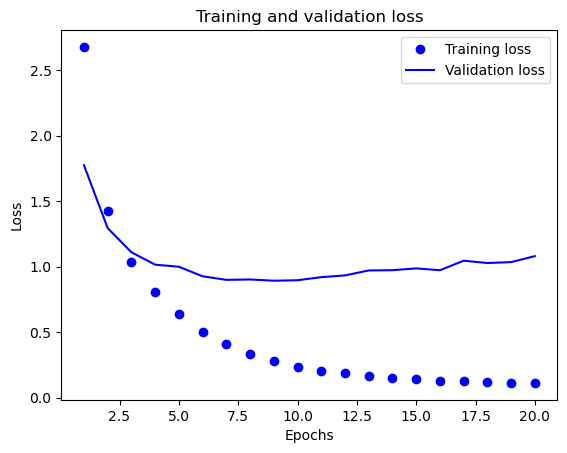

In [14]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

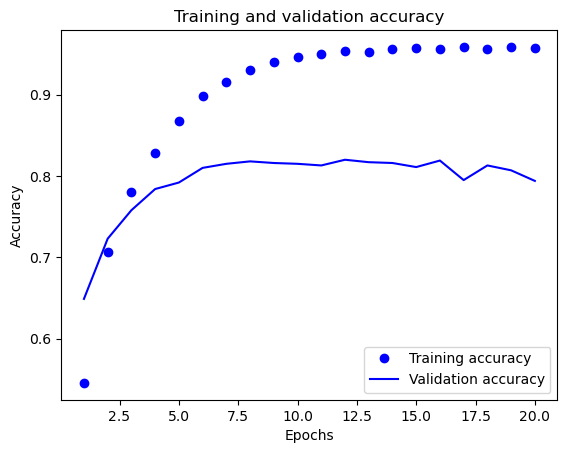

In [15]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# 모델을 처음부터 다시 훈련
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,
         y_train,
         epochs=9,
         batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
18/18 [==============================] - 0s 13ms/step - loss: 2.6659 - accuracy: 0.5153
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4056 - accuracy: 0.7088
Epoch 3/9
18/18 [==============================] - 0s 13ms/step - loss: 1.0289 - accuracy: 0.7789
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.8047 - accuracy: 0.8272
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6362 - accuracy: 0.8701
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 0.5050 - accuracy: 0.8977
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4056 - accuracy: 0.9163
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 0.3308 - accuracy: 0.9293
Epoch 9/9
71/71 [==============================] - 0s 1ms/step - loss: 0.9418 - accuracy: 0.7956
[0.9417555928230286, 0.7956367135047913]


In [19]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [20]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
# 정보 병목이 있는 모델
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 2.9836 - accuracy: 0.3786 - val_loss: 2.1444 - val_accuracy: 0.6040
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 1.7295 - accuracy: 0.6184 - val_loss: 1.5428 - val_accuracy: 0.6100
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 1.3569 - accuracy: 0.6505 - val_loss: 1.4314 - val_accuracy: 0.6470
Epoch 4/20
63/63 [==============================] - 0s 8ms/step - loss: 1.2001 - accuracy: 0.6803 - val_loss: 1.3985 - val_accuracy: 0.6610
Epoch 5/20
63/63 [==============================] - 0s 8ms/step - loss: 1.0821 - accuracy: 0.7170 - val_loss: 1.3659 - val_accuracy: 0.6880
Epoch 6/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9809 - accuracy: 0.7402 - val_loss: 1.3658 - val_accuracy: 0.6950
Epoch 7/20
63/63 [==============================] - 0s 8ms/step - loss: 0.8948 - accuracy: 0.7595 - val_loss: 1.3529 - val_accuracy: 0.7040
Epoch 8/20
63/63 [==